In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import itertools
import warnings
warnings.filterwarnings("ignore")
import statsmodels.api as sm
pd.set_option('display.max_rows',None)

In [3]:
df = pd.read_csv('../datasets/datasets_demand-forecasting-kernels-only_train.csv')
df.head()

date  store  item  sales
0  2013-01-01      1     1     13
1  2013-01-02      1     1     11
2  2013-01-03      1     1     14
3  2013-01-04      1     1     13
4  2013-01-05      1     1     10

In [4]:
df.shape

(913000, 4)

In [5]:
df_store = df.groupby(['date','store'], as_index=False).agg({'sales':sum})

In [6]:
df_store[df_store['date']=='2013-01-01']

date  store  sales
0  2013-01-01      1   1316
1  2013-01-01      2   1742
2  2013-01-01      3   1588
3  2013-01-01      4   1423
4  2013-01-01      5   1032
5  2013-01-01      6   1099
6  2013-01-01      7    964
7  2013-01-01      8   1628
8  2013-01-01      9   1383
9  2013-01-01     10   1521

In [7]:
df_store.shape

(18260, 3)

In [8]:
df_item = df.groupby(['date','item'], as_index=False).agg({'sales':sum})
df_item[(df_item['date']=='2013-01-01')]

date  item  sales
0   2013-01-01     1    133
1   2013-01-01     2    327
2   2013-01-01     3    172
3   2013-01-01     4    102
4   2013-01-01     5     83
5   2013-01-01     6    288
6   2013-01-01     7    278
7   2013-01-01     8    416
8   2013-01-01     9    245
9   2013-01-01    10    378
10  2013-01-01    11    369
11  2013-01-01    12    369
12  2013-01-01    13    444
13  2013-01-01    14    310
14  2013-01-01    15    453
15  2013-01-01    16    144
16  2013-01-01    17    171
17  2013-01-01    18    415
18  2013-01-01    19    208
19  2013-01-01    20    265
20  2013-01-01    21    222
21  2013-01-01    22    459
22  2013-01-01    23    146
23  2013-01-01    24    349
24  2013-01-01    25    447
25  2013-01-01    26    211
26  2013-01-01    27    111
27  2013-01-01    28    456
28  2013-01-01    29    351
29  2013-01-01    30    219
30  2013-01-01    31    337
31  2013-01-01    32    237
32  2013-01-01    33    384
33  2013-01-01    34    149
34  2013-01-01    35    350
35  2013-01-01    36    431
36  2013-01-01    37    157
37  2013-01-01    38    381
38  2013-01-01    39    248
39  2013-01-01    40    179
40  2013-01-01    41    103
41  2013-01-01    42    195
42  2013-01-01    43    253
43  2013-01-01    44    154
44  2013-01-01    45    396
45  2013-01-01    46    319
46  2013-01-01    47    116
47  2013-01-01    48    277
48  2013-01-01    49    159
49  2013-01-01    50    330

In [9]:
#Not an useful reduction 
df_temp = df.groupby(['date','store','item'], as_index=False).agg({'sales':sum})
df_temp.shape

(913000, 4)

In [10]:
df_store_sorted = df_store.sort_values(['store','date'])
df_store_sorted.head(10)

date  store  sales
0   2013-01-01      1   1316
10  2013-01-02      1   1264
20  2013-01-03      1   1305
30  2013-01-04      1   1452
40  2013-01-05      1   1499
50  2013-01-06      1   1613
60  2013-01-07      1   1012
70  2013-01-08      1   1228
80  2013-01-09      1   1243
90  2013-01-10      1   1339

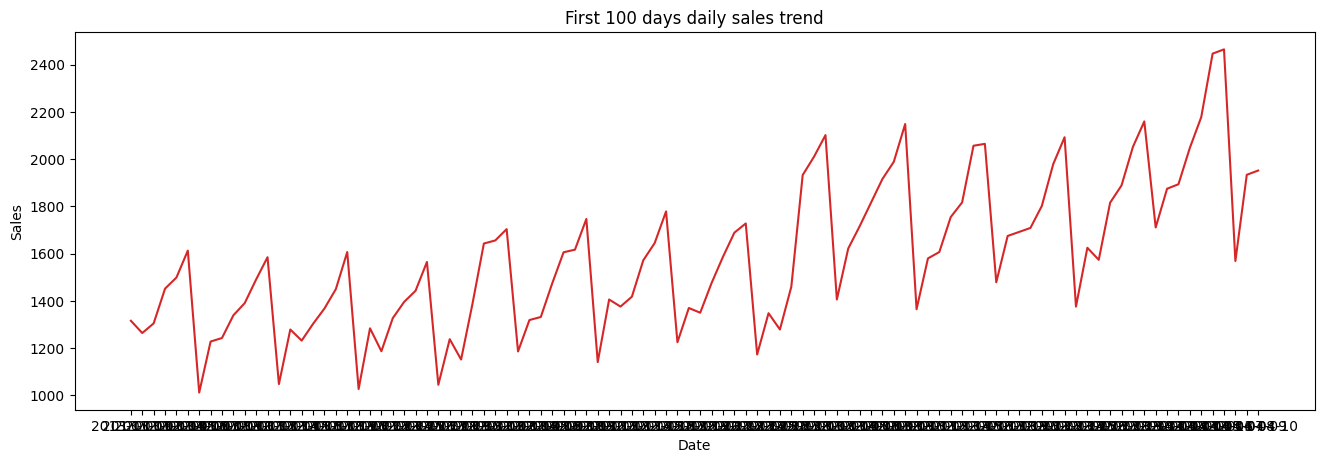

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
def plot_dataframe(df, x, y, title="", xlabel="Date", ylabel='Sales', dpi=100):
    plt.figure(figsize=(16,5), dpi=dpi)
    plt.plot(x,y, color='tab:red')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()

plot_dataframe(df_store_sorted, df_store_sorted.date[:100], df_store_sorted.sales[:100], title="First 100 days daily sales trend")

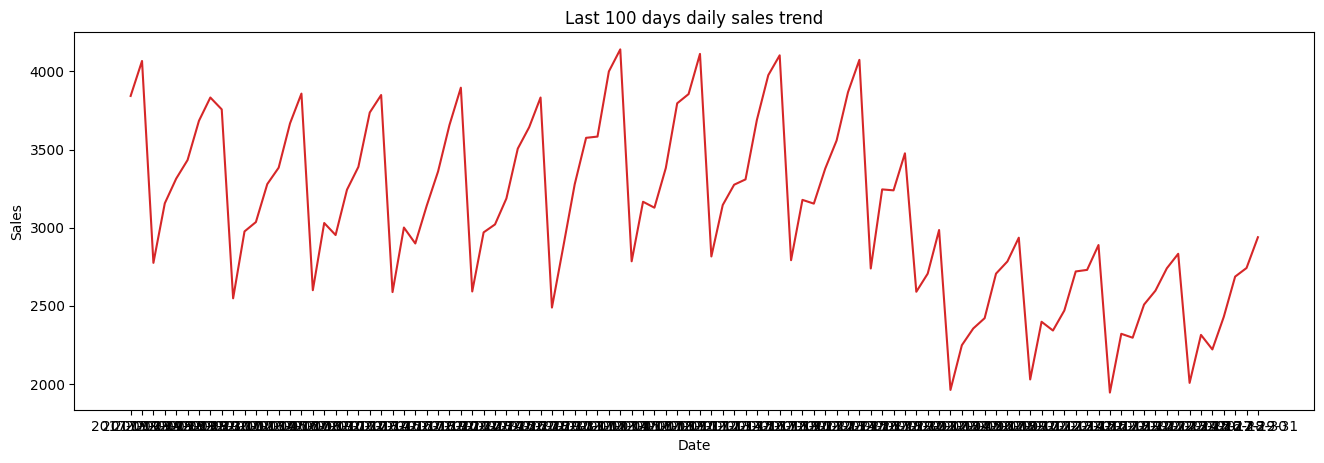

In [12]:
plot_dataframe(df_store_sorted, df_store_sorted.date.tail(100), df_store_sorted.sales.tail(100), title="Last 100 days daily sales trend")

In [13]:
test_len = int(df_store_sorted.shape[0] * 0.20)
train_len = df_store_sorted.shape[0] - test_len

df_train = df_store_sorted[:-test_len]
df_test = df_store_sorted.tail(test_len)

df_train.index = df_train['date']
df_test.index = df_test['date']

df_train.head()



date  store  sales
date                                
2013-01-01  2013-01-01      1   1316
2013-01-02  2013-01-02      1   1264
2013-01-03  2013-01-03      1   1305
2013-01-04  2013-01-04      1   1452
2013-01-05  2013-01-05      1   1499

In [14]:
df_test.head()

date  store  sales
date                                
2013-01-01  2013-01-01      9   1383
2013-01-02  2013-01-02      9   1455
2013-01-03  2013-01-03      9   1492
2013-01-04  2013-01-04      9   1612
2013-01-05  2013-01-05      9   1698

In [15]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
print(pdq)
seasonal_pdq = [(x[0], x[1], x[2], 7) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

[(0, 0, 0), (0, 0, 1), (0, 1, 0), (0, 1, 1), (1, 0, 0), (1, 0, 1), (1, 1, 0), (1, 1, 1)]
Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 7)
SARIMAX: (0, 0, 1) x (0, 1, 0, 7)
SARIMAX: (0, 1, 0) x (0, 1, 1, 7)
SARIMAX: (0, 1, 0) x (1, 0, 0, 7)


In [ ]:
import warnings
warnings.filterwarnings("ignore")
import statsmodels.api as sm

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(df_train.sales, order=param,
                                           seasonal_order=param_seasonal,
                                           enforce_stationarity=False,
                                           enforce_invertibility=False
                                           )
            results = mod.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
                    continue
            

In [27]:
mod = sm.tsa.statespace.SARIMAX(df_train.sales,
                                order=(1, 0, 1),
                                seasonal_order=(0, 1, 1, 7),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9438      0.002    398.283      0.000       0.939       0.948
ma.L1         -0.3146      0.006    -55.730      0.000      -0.326      -0.304
ma.S.L7       -0.6331      0.004   -165.503      0.000      -0.641      -0.626
sigma2      1.204e+04     48.243    249.635      0.000    1.19e+04    1.21e+04


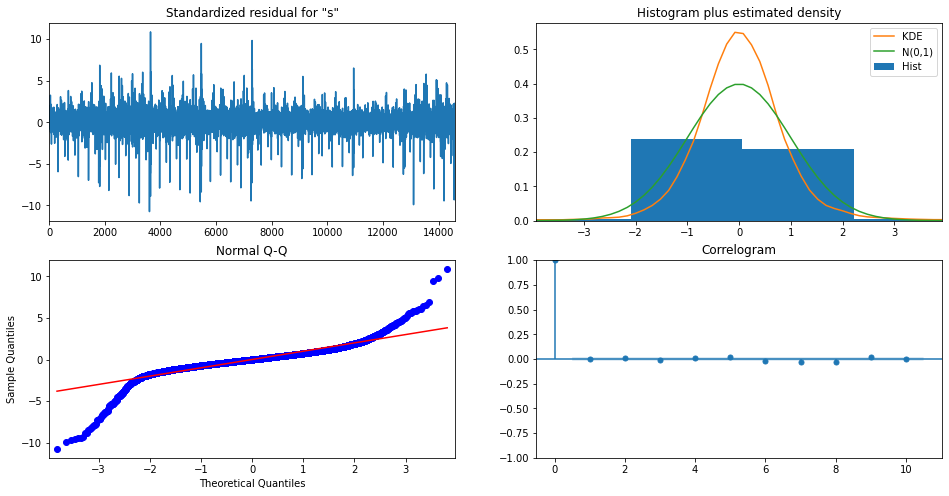

In [28]:
results.plot_diagnostics(figsize=(16, 8))
plt.show()

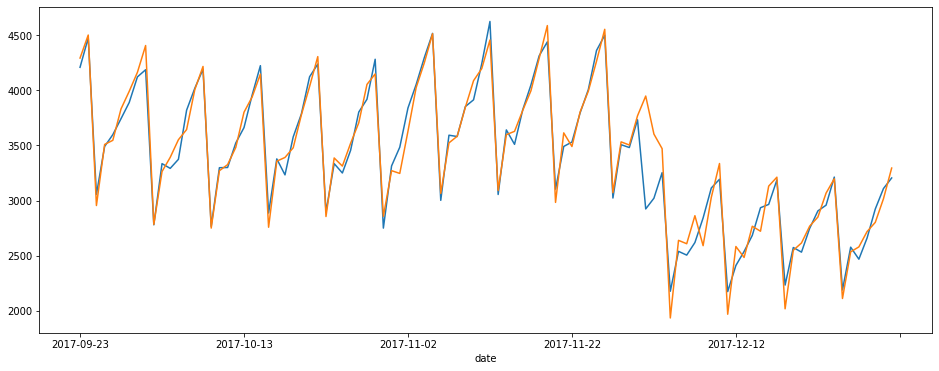

In [70]:
pred = results.get_prediction(df_train.index[0])
pred_ci = pred.conf_int()
df_print = df_store_sorted
df_print.index = df_print['date']



res_df_1 = pd.DataFrame(pred.predicted_mean)
res_df_1.reset_index(drop=True,inplace=True)
res_df_1.index= df_train.index
res_df_1['sales'] = df_train['sales']

res_df_1['date'] = df_train['date']
plt.figure(figsize=(16,6))
res_df_1.sales.tail(100).plot()
res_df_1.predicted_mean.tail(100).plot()


plt.show()

In [71]:
results.forecast(test_len)[:]

14608    2163.639846
14609    2541.905224
14610    2513.770140
14611    2718.079281
14612    2889.568290
14613    3042.992763
14614    3218.041566
14615    2158.041871
14616    2536.621884
14617    2508.783752
14618    2713.373153
14619    2885.126671
14620    3038.800786
14621    3214.085200
14622    2154.307873
14623    2533.097756
14624    2505.457698
14625    2710.234041
14626    2882.163993
14627    3036.004626
14628    3211.446198
14629    2151.817197
14630    2530.747069
14631    2503.239132
14632    2708.140170
14633    2880.187809
14634    3034.139513
14635    3209.685915
14636    2150.155850
14637    2529.179099
14638    2501.759290
14639    2706.743502
14640    2878.869641
14641    3032.895433
14642    3208.511759
14643    2149.047688
14644    2528.133221
14645    2500.772196
14646    2705.811888
14647    2877.990388
14648    3032.065599
14649    3207.728565
14650    2148.308514
14651    2527.435593
14652    2500.113778
14653    2705.190477
14654    2877.403903
14655    3031

In [72]:
forecast_df = pd.DataFrame(results.forecast(test_len))
forecast_df.index = df_test.index
forecast_df['sales'] = df_test['sales']
forecast_df.head()

predicted_mean  sales
date                             
2013-01-01     2163.639846   1383
2013-01-02     2541.905224   1455
2013-01-03     2513.770140   1492
2013-01-04     2718.079281   1612
2013-01-05     2889.568290   1698

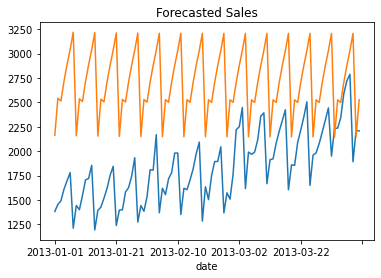

In [73]:
forecast_df['sales'].head(100).plot(title="Actual sales")
forecast_df['predicted_mean'].head(100).plot(title="Forecasted Sales")
plt.show()

In [74]:
res_df_1 = res_df_1.append(df_test)
res_df_1.shape

(18260, 4)

In [75]:
res_df_1

predicted_mean  sales        date  store
date                                                
2013-01-01        0.000000   1316  2013-01-01    NaN
2013-01-02      621.016988   1264  2013-01-02    NaN
2013-01-03      945.021536   1305  2013-01-03    NaN
2013-01-04     1097.282731   1452  2013-01-04    NaN
2013-01-05     1238.591035   1499  2013-01-05    NaN
2013-01-06     1318.052104   1613  2013-01-06    NaN
2013-01-07     1412.829143   1012  2013-01-07    NaN
2013-01-08     2419.943341   1228  2013-01-08    NaN
2013-01-09     1181.749348   1243  2013-01-09    NaN
2013-01-10     1284.366564   1339  2013-01-10    NaN
2013-01-11     1467.690330   1391  2013-01-11    NaN
2013-01-12     1464.938153   1491  2013-01-12    NaN
2013-01-13     1596.804285   1585  2013-01-13    NaN
2013-01-14      991.034249   1048  2013-01-14    NaN
2013-01-15     1249.588441   1279  2013-01-15    NaN
2013-01-16     1283.838704   1232  2013-01-16    NaN
2013-01-17     1317.315050   1303  2013-01-17    NaN
2013-01-18     1403.238400   1368  2013-01-18    NaN
2013-01-19     1457.741019   1450  2013-01-19    NaN
2013-01-20     1557.786303   1607  2013-01-20    NaN
2013-01-21     1025.818887   1027  2013-01-21    NaN
2013-01-22     1253.566444   1284  2013-01-22    NaN
2013-01-23     1254.530136   1187  2013-01-23    NaN
2013-01-24     1281.106295   1327  2013-01-24    NaN
2013-01-25     1393.805452   1396  2013-01-25    NaN
2013-01-26     1473.846620   1443  2013-01-26    NaN
2013-01-27     1580.752780   1565  2013-01-27    NaN
2013-01-28     1000.440877   1045  2013-01-28    NaN
2013-01-29     1269.877448   1238  2013-01-29    NaN
2013-01-30     1198.175921   1152  2013-01-30    NaN
2013-01-31     1268.116277   1388  2013-01-31    NaN
2013-02-01     1423.332193   1643  2013-02-01    NaN
2013-02-02     1626.203421   1656  2013-02-02    NaN
2013-02-03     1760.333105   1704  2013-02-03    NaN
2013-02-04     1163.800192   1186  2013-02-04    NaN
2013-02-05     1392.002310   1319  2013-02-05    NaN
2013-02-06     1274.273595   1332  2013-02-06    NaN
2013-02-07     1456.306296   1474  2013-02-07    NaN
2013-02-08     1605.156171   1606  2013-02-08    NaN
2013-02-09     1645.303133   1617  2013-02-09    NaN
2013-02-10     1717.045794   1747  2013-02-10    NaN
2013-02-11     1192.279963   1141  2013-02-11    NaN
2013-02-12     1342.513808   1406  2013-02-12    NaN
2013-02-13     1343.839613   1376  2013-02-13    NaN
2013-02-14     1505.640285   1418  2013-02-14    NaN
2013-02-15     1583.677311   1572  2013-02-15    NaN
2013-02-16     1606.558578   1645  2013-02-16    NaN
2013-02-17     1736.885171   1779  2013-02-17    NaN
2013-02-18     1196.144472   1225  2013-02-18    NaN
2013-02-19     1426.107934   1370  2013-02-19    NaN
2013-02-20     1351.940788   1350  2013-02-20    NaN
2013-02-21     1455.785257   1476  2013-02-21    NaN
2013-02-22     1610.350413   1587  2013-02-22    NaN
2013-02-23     1639.906359   1689  2013-02-23    NaN
2013-02-24     1786.123496   1728  2013-02-24    NaN
2013-02-25     1185.295649   1173  2013-02-25    NaN
2013-02-26     1365.956784   1348  2013-02-26    NaN
2013-02-27     1324.968544   1279  2013-02-27    NaN
2013-02-28     1410.273432   1460  2013-02-28    NaN
2013-03-01     1575.046326   1933  2013-03-01    NaN
2013-03-02     1867.249641   2011  2013-03-02    NaN
2013-03-03     2033.208239   2102  2013-03-03    NaN
2013-03-04     1500.550075   1406  2013-03-04    NaN
2013-03-05     1606.559203   1622  2013-03-05    NaN
2013-03-06     1558.263415   1716  2013-03-06    NaN
2013-03-07     1782.211259   1816  2013-03-07    NaN
2013-03-08     2041.734901   1916  2013-03-08    NaN
2013-03-09     2014.802125   1989  2013-03-09    NaN
2013-03-10     2074.437986   2149  2013-03-10    NaN
2013-03-11     1500.431914   1365  2013-03-11    NaN
2013-03-12     1597.315077   1580  2013-03-12    NaN
2013-03-13     1585.057579   1607  2013-03-13    NaN
2013-03-14     1716.239785   1755  2013-03-14    NaN
2013-03-15     1932.551846   1817  20

# ITEM forecast 

In [16]:
df_item_sorted = df_item.sort_values(['item','date'])
df_item_sorted.head(10)

date  item  sales
0    2013-01-01     1    133
50   2013-01-02     1     99
100  2013-01-03     1    127
150  2013-01-04     1    145
200  2013-01-05     1    149
250  2013-01-06     1    149
300  2013-01-07     1     92
350  2013-01-08     1    119
400  2013-01-09     1    114
450  2013-01-10     1    103

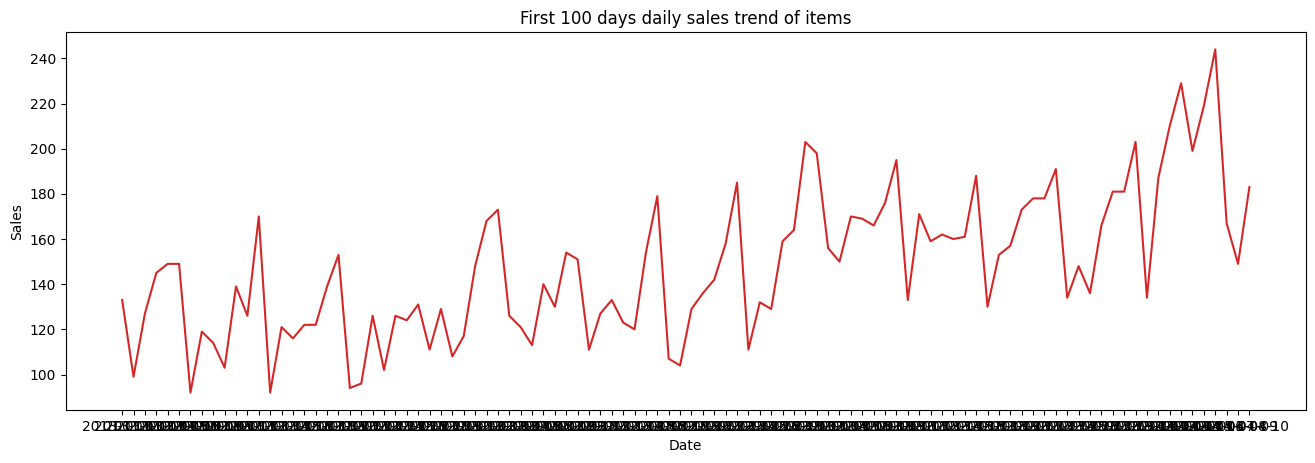

In [17]:
plot_dataframe(df_item_sorted, df_item_sorted.date[:100], df_item_sorted.sales[:100], title="First 100 days daily sales trend of items")

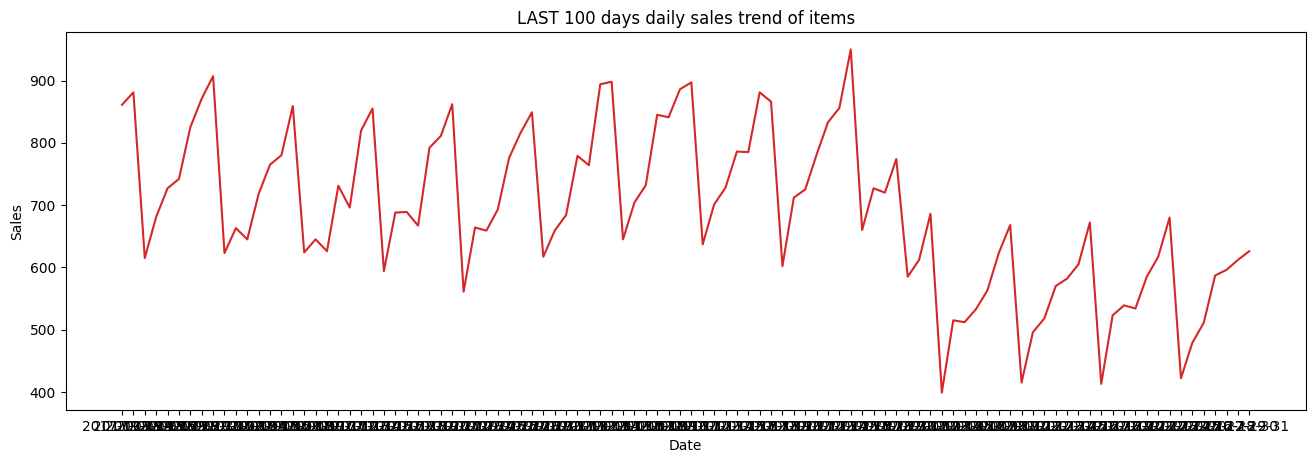

In [19]:
plot_dataframe(df_item_sorted, df_item_sorted.date.tail(100), df_item_sorted.sales.tail(100), title="LAST 100 days daily sales trend of items")

In [20]:
test_len = int(df_item_sorted.shape[0] * 0.20)
train_len = df_item_sorted.shape[0] - test_len

df_train = df_item_sorted[:-test_len]
df_test = df_item_sorted.tail(test_len)

df_train.index = df_train['date']
df_test.index = df_test['date']

df_train.head()


date  item  sales
date                               
2013-01-01  2013-01-01     1    133
2013-01-02  2013-01-02     1     99
2013-01-03  2013-01-03     1    127
2013-01-04  2013-01-04     1    145
2013-01-05  2013-01-05     1    149

In [21]:
df_test.head()

date  item  sales
date                               
2013-01-01  2013-01-01    41    103
2013-01-02  2013-01-02    41    132
2013-01-03  2013-01-03    41    131
2013-01-04  2013-01-04    41    122
2013-01-05  2013-01-05    41    142

In [22]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
print(pdq)
seasonal_pdq = [(x[0], x[1], x[2], 7) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

[(0, 0, 0), (0, 0, 1), (0, 1, 0), (0, 1, 1), (1, 0, 0), (1, 0, 1), (1, 1, 0), (1, 1, 1)]
Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 7)
SARIMAX: (0, 0, 1) x (0, 1, 0, 7)
SARIMAX: (0, 1, 0) x (0, 1, 1, 7)
SARIMAX: (0, 1, 0) x (1, 0, 0, 7)


In [ ]:
import warnings
warnings.filterwarnings("ignore")
import statsmodels.api as sm

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(df_train.sales, order=param,
                                           seasonal_order=param_seasonal,
                                           enforce_stationarity=False,
                                           enforce_invertibility=False
                                           )
            results = mod.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
                    continue
            

In [23]:
mod = sm.tsa.statespace.SARIMAX(df_train.sales,
                                order=(1, 0, 1),
                                seasonal_order=(0, 1, 1, 7),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

c:\users\abhishek r\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:583: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
c:\users\abhishek r\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:587: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  ' forecasting.', ValueWarning)
c:\users\abhishek r\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:583: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
c:\users\abhishek r\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:587: ValueWa

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9652      0.001   1173.538      0.000       0.964       0.967
ma.L1         -0.5357      0.002   -235.615      0.000      -0.540      -0.531
ma.S.L7       -0.7431      0.002   -413.465      0.000      -0.747      -0.740
sigma2      1297.9945      3.297    393.652      0.000    1291.532    1304.457


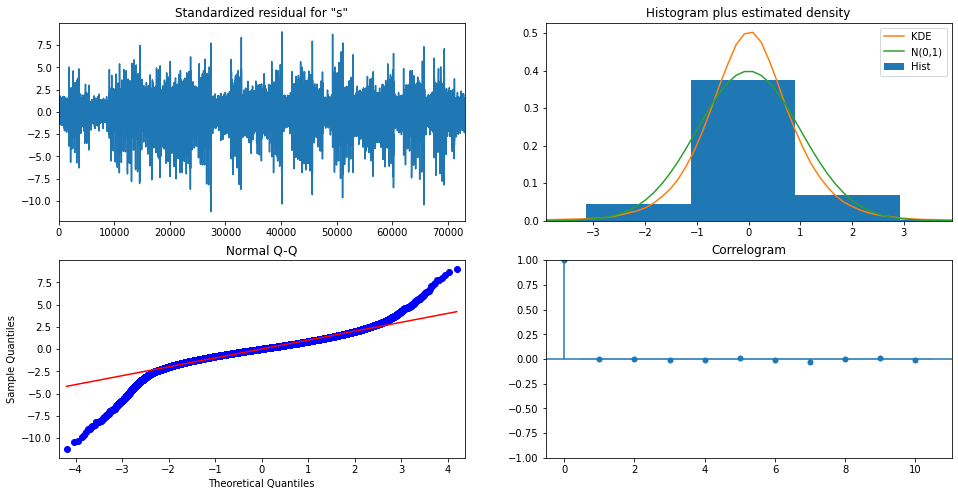

In [24]:
results.plot_diagnostics(figsize=(16, 8))
plt.show()

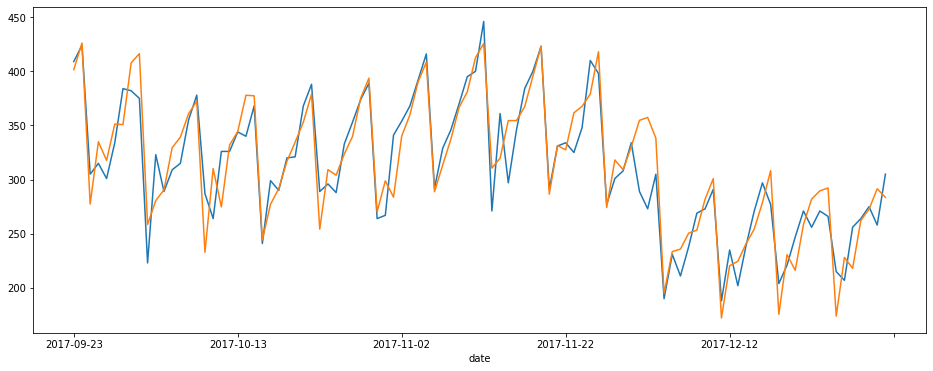

In [25]:
pred = results.get_prediction(df_train.index[0])
pred_ci = pred.conf_int()
df_print = df_item_sorted
df_print.index = df_print['date']



res_df_1 = pd.DataFrame(pred.predicted_mean)
res_df_1.reset_index(drop=True,inplace=True)
res_df_1.index= df_train.index
res_df_1['sales'] = df_train['sales']

res_df_1['date'] = df_train['date']
plt.figure(figsize=(16,6))
res_df_1.sales.tail(100).plot()
res_df_1.predicted_mean.tail(100).plot()


plt.show()

In [26]:
forecast_df = pd.DataFrame(results.forecast(test_len))
forecast_df.index = df_test.index
forecast_df['sales'] = df_test['sales']
forecast_df.head()

c:\users\abhishek r\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:379: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


predicted_mean  sales
date                             
2013-01-01      200.153343    103
2013-01-02      224.743256    132
2013-01-03      236.525709    131
2013-01-04      258.956848    122
2013-01-05      269.084595    142

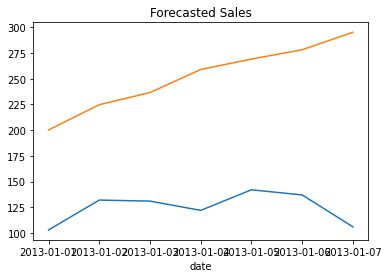

In [29]:
forecast_df['sales'].head(7).plot(title="Actual sales")
forecast_df['predicted_mean'].head(7).plot(title="Forecasted Sales")
plt.show()